<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/16_Keras_Rank_1_and_Rank_5_Accuracy_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Pre-trained Models in Keras to get Rank-1 and Rank-5 Accuracy**
1. We'll first load the pre-trained ImageNet model MobileNetV2
2. We'll get the top 5 classes from a single image inference
3. Next we'll construct a function to give us the rank-N Accuracy using a few test images

---


In [ ]:
# Load our pre-trained MobileNetV2 Model

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/imageNetclasses.json
!wget https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/images.zip
!unzip images.zip
!rm -rf ./images/class1/.DS_Store

--2025-04-10 17:51:55--  https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/imageNetclasses.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32569 (32K) [text/plain]
Saving to: ‘imageNetclasses.json’

imageNetclasses.jso 100%[===================>]  31.81K  --.-KB/s    in 0.05s   

2025-04-10 17:51:55 (670 KB/s) - ‘imageNetclasses.json’ saved [32569/32569]

--2025-04-10 17:51:55--  https://raw.githubusercontent.com/Davron030901/PyTorch/main/data/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1

In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['christmas-stockings-3006869_1280.jpg',
 'Basketball_(Ball).jpg',
 '1539714414867.jpg',
 'spiderweb_1050x700.jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg',
 'limo-safety-ftr.jpg',
 'download.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'long-haired-collie-5766447_1280.jpg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


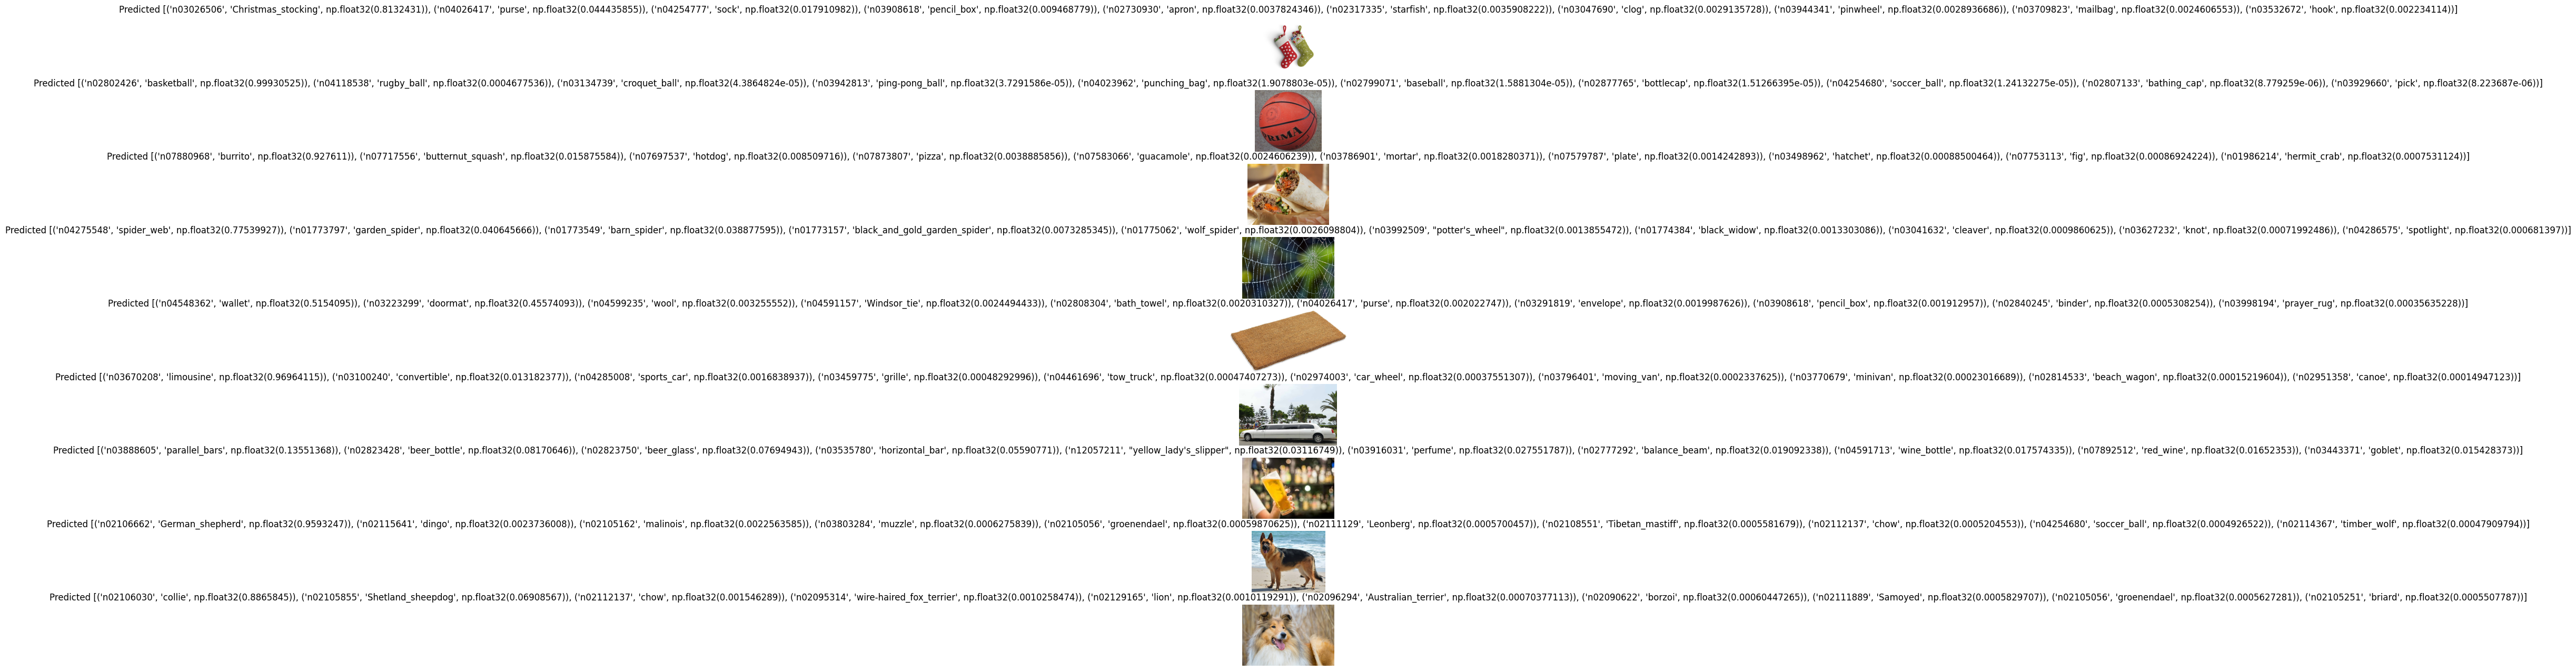

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))
all_top_classes = []

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=10)[0]
    all_top_classes.append([x[1] for x in preditions])
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions)}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
preditions

[('n02106030', 'collie', np.float32(0.8865845)),
 ('n02105855', 'Shetland_sheepdog', np.float32(0.06908567)),
 ('n02112137', 'chow', np.float32(0.001546289)),
 ('n02095314', 'wire-haired_fox_terrier', np.float32(0.0010258474)),
 ('n02129165', 'lion', np.float32(0.0010119291)),
 ('n02096294', 'Australian_terrier', np.float32(0.00070377113)),
 ('n02090622', 'borzoi', np.float32(0.00060447265)),
 ('n02111889', 'Samoyed', np.float32(0.0005829707)),
 ('n02105056', 'groenendael', np.float32(0.0005627281)),
 ('n02105251', 'briard', np.float32(0.0005507787))]

In [ ]:
all_top_classes

[['Christmas_stocking',
  'purse',
  'sock',
  'pencil_box',
  'apron',
  'starfish',
  'clog',
  'pinwheel',
  'mailbag',
  'hook'],
 ['basketball',
  'rugby_ball',
  'croquet_ball',
  'ping-pong_ball',
  'punching_bag',
  'baseball',
  'bottlecap',
  'soccer_ball',
  'bathing_cap',
  'pick'],
 ['burrito',
  'butternut_squash',
  'hotdog',
  'pizza',
  'guacamole',
  'mortar',
  'plate',
  'hatchet',
  'fig',
  'hermit_crab'],
 ['spider_web',
  'garden_spider',
  'barn_spider',
  'black_and_gold_garden_spider',
  'wolf_spider',
  "potter's_wheel",
  'black_widow',
  'cleaver',
  'knot',
  'spotlight'],
 ['wallet',
  'doormat',
  'wool',
  'Windsor_tie',
  'bath_towel',
  'purse',
  'envelope',
  'pencil_box',
  'binder',
  'prayer_rug'],
 ['limousine',
  'convertible',
  'sports_car',
  'grille',
  'tow_truck',
  'car_wheel',
  'moving_van',
  'minivan',
  'beach_wagon',
  'canoe'],
 ['parallel_bars',
  'beer_bottle',
  'beer_glass',
  'horizontal_bar',
  "yellow_lady's_slipper",
  'p

In [ ]:
# Create our ground truth labels
ground_truth = ['basketball',
                'German shepherd',
                'limousine, limo',
                'spider_web',
                'burrito',
                'beer_glass',
                'doormat',
                'Christmas_stocking',
                'collie']

In [ ]:
def getScore(all_top_classes, ground_truth, N):
  # Calcuate rank-N score
  in_labels = 0
  for (i,labels) in enumerate(all_top_classes):
    if ground_truth[i] in labels[:N]:
      in_labels += 1
  return f'Rank-{N} Accuracy = {in_labels/len(all_top_classes)*100:.2f}%'

## **Get Rank-5 Accuracy**

In [ ]:
getScore(all_top_classes, ground_truth, 5)

'Rank-5 Accuracy = 22.22%'

## **Get Rank-1 Accuracy**

In [ ]:
getScore(all_top_classes, ground_truth, 1)

'Rank-1 Accuracy = 22.22%'

In [ ]:
getScore(all_top_classes, ground_truth, 10)

'Rank-10 Accuracy = 22.22%'